In [ ]:
!pip install openpyxl SciencePlots
!sudo apt-get update -y
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super -y


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 12.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,909 kB]
Get:5 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [603 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,788 B]
Fetched 8,734 kB in 1s (7,161 kB/s)




The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libauthen-sasl-perl libbrotli1 libcups2 libcupsfilters1 libcupsimage2
  libdata-dump-perl libdrm-amdgpu1 libdrm-common libdrm-i

In [ ]:
import os
import os.path as osp
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scienceplots
plt.style.use('science')

In [ ]:
df = pd.read_excel("review_scores.xlsx")

experiment_names = ["BASELINE"]

# Enable the settings below for each experiment

ALL_EXPERIMENT_NAMES = [["BASELINE"]]
# The following are settings for reviewer types
# Varying levels of commitment
ALL_EXPERIMENT_NAMES += [["responsible_Rx1", "irresponsible_Rx1"]]
# Varying intentions
ALL_EXPERIMENT_NAMES += [["benign_Rx1", "malicious_Rx1"]]
# Varying knowledgeability
ALL_EXPERIMENT_NAMES += [["knowledgeable_Rx1", "unknowledgeable_Rx1"]]



In [ ]:
BINWIDTH = 0.25
FONT_SIZE = 24

In [ ]:
# colors = [, '#d86ecc', '#4f95da', '#46c3b8']
GREY = '#aeaeae' # Baseline
BLUE = '#4f95da' # Good settings
PINK = '#d86ecc' # Bad settings
CYAN = '#46c3b8'

experiment_name2color = {
    'BASELINE': GREY,
    'responsible_Rx1': BLUE,
    'irresponsible_Rx1': PINK,
    'benign_Rx1': BLUE,
    'malicious_Rx1': PINK,
    'knowledgeable_Rx1': BLUE,
    'unknowledgeable_Rx1': PINK,
    'conformist_ACx1': BLUE,
    'authoritarian_ACx1': PINK,
    'inclusive_ACx1': CYAN,
}

In [ ]:
def calculate_bin_edges(data, colname, binwidth):
    max_val = round_up_to_nearest_half(data[colname].max())
    min_val = round_up_to_nearest_half(data[colname].min()) - 0.5
    # Create an array from min_val to max_val with a step of binwidth
    bins = np.arange(min_val, max_val + binwidth, binwidth)
    return bins

def round_up_to_nearest_half(number):
    """
    Rounds a number up to its nearest 0.5.

    Args:
    number (float): The number to round.

    Returns:
    float: The rounded number.
    """
    return math.ceil(number * 2) / 2


Plotting BASELINE...
Correlation (responsible vs. BASELINE):	nan
Correlation (irresponsible vs. BASELINE):	nan
Plotting responsible_Rx1...
Plotting irresponsible_Rx1...
Correlation (benign vs. BASELINE):	nan
Correlation (malicious vs. BASELINE):	0.1373
Plotting benign_Rx1...
Plotting malicious_Rx1...
Correlation (knowledgeable vs. BASELINE):	0.5382
Correlation (unknowledgeable vs. BASELINE):	nan
Plotting knowledgeable_Rx1...
Plotting unknowledgeable_Rx1...


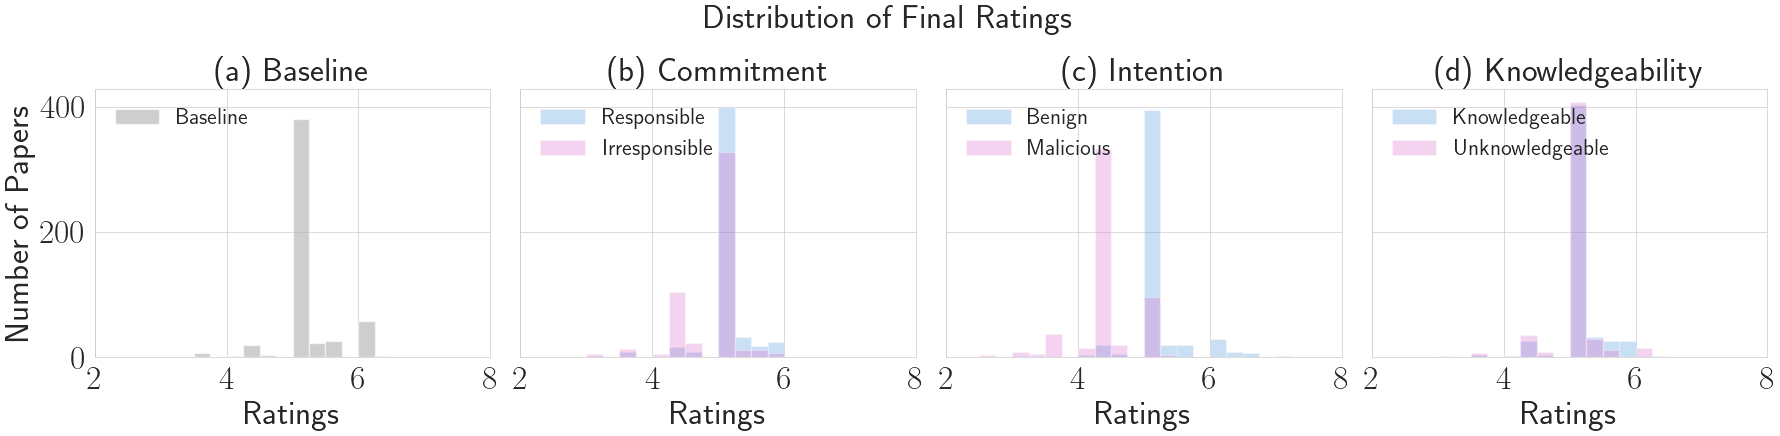

In [ ]:
def standardize_column(df, colname):
    return (df[colname] - df[colname].mean()) / df[colname].std()


# Plotting the distribution of score changes

fig, axes = plt.subplots(1, 4, figsize=(18, 4.5), sharey=True)

idx_plot = 0
sns.set_style("whitegrid")

subplot_names = ["(a) Baseline", "(b) Commitment", "(c) Intention", "(d) Knowledgeability"]

fig.suptitle('Distribution of Final Ratings', fontsize=FONT_SIZE)

for initial_or_updated in ['updated']:

    for experiment_names in ALL_EXPERIMENT_NAMES:

        for exp_name in ['BASELINE'] + experiment_names:
            if exp_name not in ['BASELINE']:
                # Calculating the Pearson correlation coefficient

                correlation_matrix = np.corrcoef(df[f"{exp_name}_avg_{initial_or_updated}"],
                                                 df[f"BASELINE_avg_{initial_or_updated}"])
                correlation = correlation_matrix[0, 1]

                print(f"Correlation ({exp_name.split('_')[0]} vs. BASELINE):\t{correlation:.4f}")

        # for colname, color in zip(columns, COLORS):
        for experiment_name in experiment_names:
            print(f"Plotting {experiment_name}...")
            # Use the custom bin edges
            colname = f'{experiment_name}_avg_{initial_or_updated}'
            bin_edges = calculate_bin_edges(df, colname, BINWIDTH)

            axes.flat[idx_plot].hist(df[colname],
                                     bins=bin_edges,
                                     alpha=0.6 if experiment_name in ['BASELINE'] else
                                     0.3,
                                     label='Baseline' if experiment_name == 'BASELINE' else experiment_name.split('_')[
                                         0].capitalize(),
                                     color=experiment_name2color[experiment_name])

        axes.flat[idx_plot].set_xlabel('Ratings', fontsize=FONT_SIZE)
        axes.flat[idx_plot].set_xlim(2, 8)

        axes.flat[idx_plot - 1].tick_params(axis='x', labelsize=FONT_SIZE)  # Set x-tick label font size
        axes.flat[idx_plot - 1].tick_params(axis='y', labelsize=FONT_SIZE)  # Set y-tick label font size
        axes.flat[idx_plot].set_title(subplot_names[idx_plot], fontsize=FONT_SIZE)

        legend = axes.flat[idx_plot].legend(fontsize=16, loc='upper left')
        legend.get_frame().set_alpha(0.5)
        idx_plot += 1

axes.flat[0].set_ylabel('Number of Papers', fontsize=FONT_SIZE)
plt.tight_layout()
plt.savefig(osp.join("histplot_review_ratings.pdf"), dpi=300)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34bbb3e4-63c3-48b7-83bd-85fd642ee383' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>